# Text classification using LSTM

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop

from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
%matplotlib inline

In [26]:
df=pd.read_csv(r'D:\Drive D\One drive folder\OneDrive - Higher Education Commission\Drive G\Data science coding\Data sets\spam.csv',delimiter=',',encoding='latin-1')

In [27]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


C:\Users\adeel\AppData\Local\Temp\ipykernel_2940\1560956903.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="v1", data=df, palette="hls")


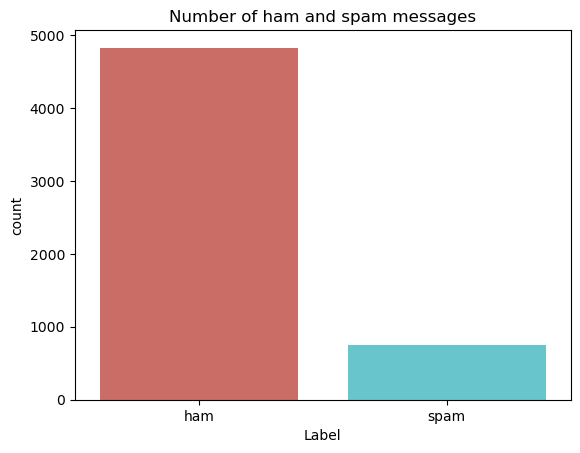

In [28]:
sns.countplot(x="v1", data=df, palette="hls")
plt.xlabel('Label')
plt.title('Number of ham and spam messages') # to make both categories of different colors
plt.show()


In [29]:
X=df.v2
Y=df.v1
le=LabelEncoder()
Y=le.fit_transform(Y)
Y=Y.reshape(-1,1)


In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15)

In [31]:
# tokenization
# A good way to convert text data into a format that can be used by machine learning algorithms is to convert the text into a matrix of token counts. This is called a Bag-of-Words model. We can do this using the Tokenizer class provided by the Keras API.
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [32]:
def RNN():
    input=Input(name='inputs',shape=[max_len])
    layer=Embedding(max_words,50,input_length=max_len)(input)
    layer=LSTM(64)(layer)
    layer=Dense(256,name='FC1')(layer)
    layer=Activation('relu')(layer)
    layer=Dropout(0.5)(layer)
    layer=Dense(1,name='out_layer')(layer)
    layer=Activation('sigmoid')(layer)
    model=Model(inputs=input,outputs=layer)
    return model

In [33]:
model=RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

c:\Users\adeel\miniconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 150, 50)        │        50,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC1 (Dense)                     │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out_layer (Dense)               │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,337 (376.32 KB)

 Trainable params: 96,337 (376.32 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - accuracy: 0.8176 - loss: 0.4707 - val_accuracy: 0.9589 - val_loss: 0.2283
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - accuracy: 0.9503 - loss: 0.1836 - val_accuracy: 0.9789 - val_loss: 0.1219
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 216ms/step - accuracy: 0.9752 - loss: 0.0982 - val_accuracy: 0.9863 - val_loss: 0.0582
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.9809 - loss: 0.0644 - val_accuracy: 0.9884 - val_loss: 0.0523
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.9888 - loss: 0.0426 - val_accuracy: 0.9895 - val_loss: 0.0519
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.9902 - loss: 0.0348 - val_accuracy: 0.9905 - val_loss: 0.0517
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - accuracy: 0.9935 - loss: 0.0267 - val_accuracy: 0.9895 - val_loss: 0.0547


In [49]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [50]:
accr=model.evaluate(test_sequences_matrix,Y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9821 - loss: 0.0550


In [51]:
testing_context = ["I am watching here?"]

In [52]:
txts=tok.texts_to_sequences(testing_context)
txts=sequence.pad_sequences(txts,maxlen=max_len)

In [53]:
pred=model.predict(txts)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
[[0.00020305]]


In [54]:
# prediction seems to be correct because value is very low 0.007852

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed
from keras.layers import LSTM

In [3]:
# Training parameters.
batch_size = 32
num_classes = 10
epochs = 5

In [4]:
# Embedding dimensions.
row_hidden = 128
col_hidden = 128

In [5]:
# Split the data into training and testing
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
# Reshape data into 4D for Hierarchical RNN.
# HRNN can learn across multiple levels of temporal hierarchy over a complex sequence.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# 28, 28: These values refer to the height and width of each image. In this case, the images are being reshaped into 28x28 pixel dimensions,
#  which is common for datasets like MNIST, where each image is 28x28 pixels in size.
# 1: This is the number of channels. For grayscale images, there is only one channel, hence the value 1. 
# If the images were in RGB color, this value would be 3 (representing Red, Green, and Blue channels).
x_test=x_test.reshape(x_test.shape[0], 28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255



In [11]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
 # convert class vecors to binary class matrices